# doc2vec on corpus

Kita coba analisis "ciri-ciri" dokumen hoax yang membedakan dengan dokumen fakta sebetulnya apa. Hipotesisnya dengan ```doc2vec``` dapat diekstrak fitur penciri (_differentiating features_) dari dokumen hoax.


In [2]:
import pandas as pd

Sebelumnya corpus yang sudah terkumpul dipisahkan secara manual ke dua file csv terpisah, ```hoax.csv``` dan ```facts.csv```. Kali ini dicoba untuk membaca semua corpus secara terpadu dari satu file csv yang memuat dua kelompok dokumen hoax dan facts.


In [3]:
#fakta = pd.read_csv('hoax.csv')
#fakta.head()
corpus = pd.read_csv('corpus.csv')
corpus.head()


,Judul,Isi,Label
0,Kabar Warga Bantaran Citarum Diminta Waspadai ...,Di tengah pemberitaan banjir di Pagarsih Bandu...,fact
1,Pesan Bijak Bintang Iklan Rokok Sebelum Mening...,"Foto Wayne McLaren, seorang mantan bintang ikl...",fact
2,Anggota Parlemen Ukraina Dilemparkan ke Bak Sa...,"""Di Ukraina Jika Anggota DPR Ga Becus Langsung...",fact
3,Ubah HGB Jadi SHM di BPN Depok Cuma Bayar Rp 5...,Beredar pesan berantai yang berisi informasi t...,fact
4,Kartu 'Bebas Masalah' Khusus Untuk Bule di Bali,Pesan berantai beredar melalui media sosial te...,fact


In [4]:
'''
dataframe[dataframe.column == value] will filter a dataframe based on row that fulfill criteria
dataframe.iloc[row_start:row_end, col_start:col_end] filters a dataframe using slicing method
'''
corpus_hoax = corpus[corpus.Label == 'hoax'].iloc[:, 0:2]
corpus_facts = corpus[corpus.Label == 'fact'].iloc[:, 0:2]
corpus_hoax.head()


,Judul,Isi
64,PNS Bantul Ditangkap Terkait Sindikat Saracen,Terungkapnya jaringan Saracen menjadi pemberit...
65,Kabar Singapore Airlines Terbakar di Changi,Isu ini dihembuskan pertama kali oleh pemilik ...
66,Kabut di Yogya Imbas Aktivitas Merapi,Pesan berantai di media sosial dan grup komuni...
67,Heboh Suhu Panas Ekstrem di Kuwait Bikin Pohon...,"Dalam sepekan terakhir, beredar foto dan video..."
68,Beredar Foto Jarum Suntik 'Penular' HIV-AIDS d...,"""Hati-hati mengambil tisu di toilet umum! Tolo..."


In [7]:
corpus_hoax.shape


(55, 2)

In [8]:
corpus_facts.shape


(64, 2)

In [8]:
for isi in corpus_hoax.iterrows():
    print isi[1]
    

Judul        PNS Bantul Ditangkap Terkait Sindikat Saracen
Isi      Terungkapnya jaringan Saracen menjadi pemberit...
Name: 64, dtype: object
Judul          Kabar Singapore Airlines Terbakar di Changi
Isi      Isu ini dihembuskan pertama kali oleh pemilik ...
Name: 65, dtype: object
Judul                Kabut di Yogya Imbas Aktivitas Merapi
Isi      Pesan berantai di media sosial dan grup komuni...
Name: 66, dtype: object
Judul    Heboh Suhu Panas Ekstrem di Kuwait Bikin Pohon...
Isi      Dalam sepekan terakhir, beredar foto dan video...
Name: 67, dtype: object
Judul    Beredar Foto Jarum Suntik 'Penular' HIV-AIDS d...
Isi      "Hati-hati mengambil tisu di toilet umum! Tolo...
Name: 68, dtype: object
Judul    Makan Cokelat Setelah Makan Mi Goreng Bisa Bik...
Isi      Ada seorang wanita meninggal mendadak dengan k...
Name: 69, dtype: object
Judul    Geger Motor 'Hantu' Terparkir 2 Tahun di Jalan...
Isi      Kabar ini berawal dari postingan pengguna Face...
Name: 70, dtype: object
Judul 

In [22]:
%matplotlib inline

import networkx as nx
import matplotlib as plt

G = nx.Graph()


In [23]:
berita = 'pesan berantai itu menyebut bentrokan terjadi akibat ojek online meminta pertanggungjawaban kepada kubu angkot gabungan atas tewasnya pengemudi ojek online di jalan bkr bandung'

words = berita.split()

for idx in range(1, len(words)):
    print words[idx-1], words[idx]
    G.add_edge(words[idx-1], words[idx])
    

pesan berantai
berantai itu
itu menyebut
menyebut bentrokan
bentrokan terjadi
terjadi akibat
akibat ojek
ojek online
online meminta
meminta pertanggungjawaban
pertanggungjawaban kepada
kepada kubu
kubu angkot
angkot gabungan
gabungan atas
atas tewasnya
tewasnya pengemudi
pengemudi ojek
ojek online
online di
di jalan
jalan bkr
bkr bandung


{'akibat': Text(-0.0589038,-0.597358,'akibat'),
 'angkot': Text(-0.288208,0.65673,'angkot'),
 'atas': Text(-0.0714549,0.21143,'atas'),
 'bandung': Text(0.211914,0.529866,'bandung'),
 'bentrokan': Text(0.445574,-0.721962,'bentrokan'),
 'berantai': Text(0.968004,-0.263581,'berantai'),
 'bkr': Text(0.0558338,0.401745,'bkr'),
 'di': Text(-0.330773,0.0638416,'di'),
 'gabungan': Text(-0.165509,0.466666,'gabungan'),
 'itu': Text(0.851429,-0.460746,'itu'),
 'jalan': Text(-0.160761,0.252276,'jalan'),
 'kepada': Text(-0.607117,0.554472,'kepada'),
 'kubu': Text(-0.475283,0.705801,'kubu'),
 'meminta': Text(-0.628524,0.0744797,'meminta'),
 'menyebut': Text(0.677142,-0.629562,'menyebut'),
 'ojek': Text(-0.257401,-0.380061,'ojek'),
 'online': Text(-0.441341,-0.131047,'online'),
 'pengemudi': Text(-0.14861,-0.242309,'pengemudi'),
 'pertanggungjawaban': Text(-0.68574,0.324897,'pertanggungjawaban'),
 'pesan': Text(1,-0.0662323,'pesan'),
 'terjadi': Text(0.186325,-0.713169,'terjadi'),
 'tewasnya': Text(-

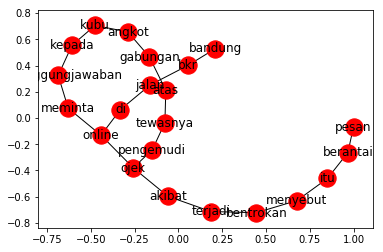

In [33]:
labels = {}

for idx in range(len(words)):
    labels[idx] = words[idx]
    
pos = nx.spring_layout(G)
#nx.draw_circular(G, pos, with_labels=True)
#nx.draw_spectral(G)
#nx.draw(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
#plt.show()